In [ ]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report

In [ ]:
#READING FILE AND LOADING DATASET

df=pd.read_csv("weatherAUS.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43371 entries, 0 to 43370
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           43371 non-null  object 
 1   Location       43370 non-null  object 
 2   MinTemp        42854 non-null  float64
 3   MaxTemp        42990 non-null  float64
 4   Rainfall       42156 non-null  float64
 5   Evaporation    22215 non-null  float64
 6   Sunshine       16920 non-null  float64
 7   WindGustDir    38232 non-null  object 
 8   WindGustSpeed  38237 non-null  float64
 9   WindDir9am     38632 non-null  object 
 10  WindDir3pm     41203 non-null  object 
 11  WindSpeed9am   42491 non-null  float64
 12  WindSpeed3pm   41860 non-null  float64
 13  Humidity9am    42664 non-null  float64
 14  Humidity3pm    42003 non-null  float64
 15  Pressure9am    36657 non-null  float64
 16  Pressure3pm    36671 non-null  float64
 17  Cloud9am       26262 non-null  float64
 18  Cloud3

In [ ]:
df.drop(["Date","Location"],axis=1,inplace=True)    #There is no use of date and location column  

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,42854.000000,42990.000000,42156.000000,22215.000000,16920.000000,38237.000000,42491.000000,41860.000000,42664.000000,42003.000000,36657.000000,36671.000000,26262.000000,25970.000000,42900.000000,42237.000000
mean,13.137604,23.854027,2.684602,5.621873,7.583688,38.649162,13.022640,17.769517,69.981624,52.151418,1018.278820,1015.725453,4.327469,4.409973,17.681289,22.385442
std,5.804873,6.027769,9.367318,4.575636,3.829433,13.812081,9.054741,9.350373,17.464015,20.499694,6.701465,6.650942,2.922437,2.703805,5.401104,5.862578
min,-4.800000,6.300000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.000000,6.000000
25%,8.900000,19.400000,0.000000,2.800000,4.800000,30.000000,6.000000,11.000000,58.000000,37.000000,1013.800000,1011.200000,1.000000,2.000000,13.800000,18.100000
50%,13.700000,23.300000,0.000000,4.600000,8.700000,37.000000,13.000000,17.000000,71.000000,52.000000,1018.400000,1015.800000,5.000000,5.000000,18.200000,21.800000
75%,17.800000,27.500000,0.800000,7.400000,10.500000,46.000000,19.000000,24.000000,83.000000,67.000000,1022.800000,1020.200000,7.000000,7.000000,21.700000,25.900000
max,29.700000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.000000,9.000000,8.000000,37.700000,46.700000


In [ ]:
#FINDING NULL VALUES
(df.isna().sum()/df.shape[0])*100

MinTemp           1.192041
MaxTemp           0.878467
Rainfall          2.801411
Evaporation      48.779138
Sunshine         60.987757
WindGustDir      11.848931
WindGustSpeed    11.837403
WindDir9am       10.926656
WindDir3pm        4.998732
WindSpeed9am      2.029006
WindSpeed3pm      3.483895
Humidity9am       1.630122
Humidity3pm       3.154181
Pressure9am      15.480390
Pressure3pm      15.448110
Cloud9am         39.448018
Cloud3pm         40.121279
Temp9am           1.085979
Temp3pm           2.614650
RainToday         2.801411
RainTomorrow      2.799105
dtype: float64

In [ ]:
#columns which have null values less than 3% ,will drop that row using dropna method
#columns with have null values more than 40%,will drop that column using drop method
#columns which have null values more than 3% and less than 40% ,will fill the null values by simple imputer

In [ ]:
df.drop(["Evaporation","Sunshine"],axis=1,inplace=True)    #null values more than 40%

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["WindGustSpeed","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm"]]=si.fit_transform(df[["WindGustSpeed","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm"]])

In [ ]:
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[["WindGustDir","WindDir9am"]]=si.fit_transform(df[["WindGustDir","WindDir9am"]]
)


In [ ]:
df.isna().sum()

MinTemp           517
MaxTemp           381
Rainfall         1215
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm       2168
WindSpeed9am      880
WindSpeed3pm     1511
Humidity9am       707
Humidity3pm      1368
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am           471
Temp3pm          1134
RainToday        1215
RainTomorrow     1214
dtype: int64

In [ ]:
#droping the rows of null values which are less than 3%
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#HANDLING CATEGORICAL VALUES
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
oe=OrdinalEncoder()

In [ ]:
df["WindGustDir"]=oe.fit_transform(df[["WindGustDir"]])
df.WindGustDir

0        13.0
1        14.0
2        15.0
3         4.0
4        13.0
         ... 
43365    10.0
43366     5.0
43367    12.0
43368     9.0
43369     6.0
Name: WindGustDir, Length: 39179, dtype: float64

In [ ]:
df["WindDir3pm"]=oe.fit_transform(df[["WindDir3pm"]])
df.WindDir3pm

0        14.0
1        15.0
2        15.0
3         0.0
4         7.0
         ... 
43365     9.0
43366     5.0
43367    13.0
43368     3.0
43369     3.0
Name: WindDir3pm, Length: 39179, dtype: float64

In [ ]:
df["WindDir9am"]=oe.fit_transform(df[["WindDir9am"]])
df.WindDir9am

0        13.0
1         6.0
2        13.0
3         9.0
4         1.0
         ... 
43365    14.0
43366     3.0
43367     2.0
43368    10.0
43369    15.0
Name: WindDir9am, Length: 39179, dtype: float64

In [ ]:
df["RainToday"]=oe.fit_transform(df[["RainToday"]])
df.RainToday

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43365    0.0
43366    1.0
43367    0.0
43368    0.0
43369    0.0
Name: RainToday, Length: 39179, dtype: float64

In [ ]:
df["RainTomorrow"]=le.fit_transform(df[["RainTomorrow"]])
df.RainTomorrow

0        0
1        0
2        0
3        0
4        0
        ..
43365    1
43366    0
43367    0
43368    0
43369    0
Name: RainTomorrow, Length: 39179, dtype: int64

In [ ]:
#SEPARATING X AND Y i.e.FEATURES AND TARGET
x=df.iloc[:,:-1]
x

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.409973,16.9,21.8,0.0
1,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.327469,4.409973,17.2,24.3,0.0
2,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.327469,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.327469,4.409973,18.1,26.5,0.0
4,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43365,21.5,29.7,0.0,10.0,39.0,14.0,9.0,15.0,11.0,57.0,55.0,1008.3,1007.4,7.000000,1.000000,25.1,28.3,0.0
43366,20.5,25.4,1.6,5.0,44.0,3.0,5.0,7.0,26.0,88.0,84.0,1010.7,1007.5,8.000000,8.000000,21.3,23.3,1.0
43367,21.3,33.0,0.2,12.0,56.0,2.0,13.0,4.0,15.0,68.0,31.0,1001.9,1003.6,4.327469,4.409973,25.2,31.0,0.0
43368,17.4,22.3,0.0,9.0,41.0,10.0,3.0,17.0,9.0,71.0,67.0,1017.8,1015.4,7.000000,8.000000,18.7,20.2,0.0


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
43365    1
43366    0
43367    0
43368    0
43369    0
Name: RainTomorrow, Length: 39179, dtype: int64

In [ ]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [ ]:
#ADDING HIDDEN LAYER AND OUTPUT LAYER

ann=Sequential()

ann.add(Dense(units=100,activation="relu"))
ann.add(Dropout(0.35))
ann.add(Dense(units=50,activation="relu"))
ann.add(Dense(units=100,activation="relu"))
ann.add(Dropout(0.35))
ann.add(Dense(units=50,activation="relu"))

ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),verbose=1,callbacks=[early_stop],batch_size=40,epochs=500)

Epoch 1/500
735/735 [==============================] - 4s 4ms/step - loss: 0.3892 - accuracy: 0.8303 - val_loss: 0.3515 - val_accuracy: 0.8494
Epoch 2/500
735/735 [==============================] - 4s 5ms/step - loss: 0.3611 - accuracy: 0.8457 - val_loss: 0.3479 - val_accuracy: 0.8516
Epoch 3/500
735/735 [==============================] - 2s 3ms/step - loss: 0.3553 - accuracy: 0.8475 - val_loss: 0.3429 - val_accuracy: 0.8538
Epoch 4/500
735/735 [==============================] - 3s 4ms/step - loss: 0.3516 - accuracy: 0.8513 - val_loss: 0.3460 - val_accuracy: 0.8548
Epoch 5/500
735/735 [==============================] - 3s 4ms/step - loss: 0.3504 - accuracy: 0.8502 - val_loss: 0.3449 - val_accuracy: 0.8525
Epoch 6/500
735/735 [==============================] - 3s 4ms/step - loss: 0.3484 - accuracy: 0.8521 - val_loss: 0.3395 - val_accuracy: 0.8547
Epoch 7/500
735/735 [==============================] - 3s 4ms/step - loss: 0.3458 - accuracy: 0.8528 - val_loss: 0.3428 - val_accuracy: 0.8551

In [ ]:
ann.history.history  #data points of loss with respect to epochs

{'loss': [0.3892022967338562,
  0.36107468605041504,
  0.35531216859817505,
  0.3515997529029846,
  0.3503912389278412,
  0.34837859869003296,
  0.34581509232521057,
  0.3451552093029022,
  0.34309011697769165,
  0.34386929869651794,
  0.3424406349658966,
  0.3401895761489868,
  0.3416176736354828,
  0.33844301104545593,
  0.33884841203689575,
  0.33750101923942566,
  0.33814600110054016,
  0.3377838134765625,
  0.3369290828704834,
  0.33437395095825195,
  0.3353709876537323,
  0.3346218764781952,
  0.33452072739601135,
  0.3333396315574646,
  0.3338380753993988,
  0.3315393030643463,
  0.33158233761787415],
 'accuracy': [0.830349862575531,
  0.845698356628418,
  0.8475360870361328,
  0.8513136506080627,
  0.8501905798912048,
  0.8521304130554199,
  0.8527770042419434,
  0.851143479347229,
  0.853661835193634,
  0.8549891114234924,
  0.8529812097549438,
  0.854512631893158,
  0.8537299036979675,
  0.8546828031539917,
  0.8537639379501343,
  0.8547168374061584,
  0.8548529744148254,
  0

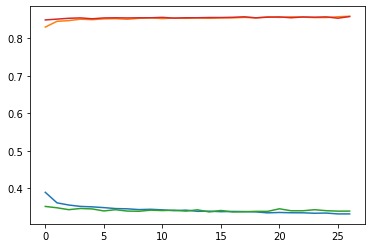

In [ ]:
plt.plot(pd.DataFrame(ann.history.history))
plt.show()

In [ ]:
yp=ann.predict(xtest)

307/307 [==============================] - 1s 1ms/step


In [ ]:
yp=np.where(yp<0.5,0,1)
yp


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#FINDING ACCURACY
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7615
           1       0.79      0.50      0.61      2180

    accuracy                           0.86      9795
   macro avg       0.83      0.73      0.76      9795
weighted avg       0.85      0.86      0.85      9795

